<a href="https://colab.research.google.com/github/Kriegtho/2022_ML_EES/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [2]:
import pooch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

Saving StormEvents_details-ftp_v1.0_d2009_c20220425.csv to StormEvents_details-ftp_v1.0_d2009_c20220425.csv


In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
     

In [6]:
# libraries for the files in google drive
import pandas as pd
from pydrive.auth import GoogleAuth
from google.colab import drive
from google.colab import auth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1jfdPGLWpRHH9eCJDuy5a1sNlK1Xp0XV3'

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('StormEvents_details-ftp_v1.0_d2009_c20220425.csv')
df  = pd.read_csv("StormEvents_details-ftp_v1.0_d2009_c20220425.csv")
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200912,9,400,200912,9,1400,35732,206802,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong low pressure moved over the Cape Cod Ca...,A tree was downed in Pelham by heavy snow and ...,CSV
1,200901,18,300,200901,18,1700,25713,150209,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system in the Great Lakes redev...,Seven inches of snow fell in eastern Hillsboro...,CSV
2,200901,28,950,200901,28,2200,25704,150108,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low pressure system moved through sou...,Nearly six inches of snow fell across eastern ...,CSV
3,200901,7,900,200901,7,2000,25707,150115,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,An eighth of an inch of ice and 2.6 inches of ...,CSV
4,200901,11,0,200901,11,1300,25710,150128,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,Eight inches of snow fell in eastern Hillsboro...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57393,200907,18,1705,200907,18,1705,32466,190198,LOUISIANA,22,...,7.0,N,HOLLY BEACH,29.8648,-93.4693,29.8648,-93.4693,A line of strong to severe thunderstorms devel...,Cameron Pilot reported lightning started a fir...,CSV
57394,200907,18,1800,200907,18,1800,32462,190059,TEXAS,48,...,1.0,WSW,PEVETO,30.1226,-93.8395,30.1226,-93.8395,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported the Old First Bap...,CSV
57395,200907,18,1540,200907,18,1540,32462,190066,TEXAS,48,...,0.0,SW,PINE FOREST,30.1773,-94.0337,30.1773,-94.0337,A line of strong to severe thunderstorms devel...,An 84 year old Pine Forest resident was killed...,CSV
57396,200907,18,1625,200907,18,1625,32462,190070,TEXAS,48,...,0.0,N,BEAUMONT,30.0800,-94.1000,30.0800,-94.1000,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported numerous downed p...,CSV


In [ ]:
https://drive.google.com/file/d/1jfdPGLWpRHH9eCJDuy5a1sNlK1Xp0XV3/view?usp=share_link

In [7]:
df = pd.DataFrame(df)
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,200912,9,400,200912,9,1400,35732,206802,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strong low pressure moved over the Cape Cod Ca...,A tree was downed in Pelham by heavy snow and ...,CSV
1,200901,18,300,200901,18,1700,25713,150209,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system in the Great Lakes redev...,Seven inches of snow fell in eastern Hillsboro...,CSV
2,200901,28,950,200901,28,2200,25704,150108,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong low pressure system moved through sou...,Nearly six inches of snow fell across eastern ...,CSV
3,200901,7,900,200901,7,2000,25707,150115,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,An eighth of an inch of ice and 2.6 inches of ...,CSV
4,200901,11,0,200901,11,1300,25710,150128,NEW HAMPSHIRE,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A low pressure system moved across the Ohio Va...,Eight inches of snow fell in eastern Hillsboro...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57393,200907,18,1705,200907,18,1705,32466,190198,LOUISIANA,22,...,7.0,N,HOLLY BEACH,29.8648,-93.4693,29.8648,-93.4693,A line of strong to severe thunderstorms devel...,Cameron Pilot reported lightning started a fir...,CSV
57394,200907,18,1800,200907,18,1800,32462,190059,TEXAS,48,...,1.0,WSW,PEVETO,30.1226,-93.8395,30.1226,-93.8395,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported the Old First Bap...,CSV
57395,200907,18,1540,200907,18,1540,32462,190066,TEXAS,48,...,0.0,SW,PINE FOREST,30.1773,-94.0337,30.1773,-94.0337,A line of strong to severe thunderstorms devel...,An 84 year old Pine Forest resident was killed...,CSV
57396,200907,18,1625,200907,18,1625,32462,190070,TEXAS,48,...,0.0,N,BEAUMONT,30.0800,-94.1000,30.0800,-94.1000,A line of strong to severe thunderstorms devel...,Beaumont Enterprise reported numerous downed p...,CSV


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [43]:
df.isna().sum()

BEGIN_YEARMONTH           0
BEGIN_DAY                 0
BEGIN_TIME                0
END_YEARMONTH             0
END_DAY                   0
END_TIME                  0
EPISODE_ID                0
EVENT_ID                  0
STATE                     0
STATE_FIPS                0
YEAR                      0
MONTH_NAME                0
EVENT_TYPE                0
CZ_TYPE                   0
CZ_FIPS                   0
CZ_NAME                   0
WFO                       0
BEGIN_DATE_TIME           0
CZ_TIMEZONE               0
END_DATE_TIME             0
INJURIES_DIRECT           0
INJURIES_INDIRECT         0
DEATHS_DIRECT             0
DEATHS_INDIRECT           0
DAMAGE_PROPERTY        8720
DAMAGE_CROPS           8704
SOURCE                    0
MAGNITUDE             25364
MAGNITUDE_TYPE        38705
FLOOD_CAUSE           51329
CATEGORY              57397
TOR_F_SCALE           56125
TOR_LENGTH            56125
TOR_WIDTH             56125
TOR_OTHER_WFO         57283
TOR_OTHER_CZ_STATE  

In [8]:
df.describe()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE_FIPS,YEAR,...,CATEGORY,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_CZ_FIPS,BEGIN_RANGE,END_RANGE,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
count,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.000000,57398.0,...,1.0,1273.000000,1273.000000,115.000000,37573.000000,37573.000000,37573.000000,37573.000000,37573.000000,37573.000000
mean,200906.041204,14.892174,1316.168351,200906.041221,15.859542,1430.992630,30027.738806,176563.456793,31.078557,2009.0,...,4.0,2.444423,142.087251,104.373913,2.470897,2.494717,37.116742,-90.685642,37.110546,-90.676459
std,3.126154,8.782394,652.409338,3.126140,8.855667,593.868956,3225.193994,18196.775879,17.931266,0.0,...,NaN,3.426312,207.843721,80.748414,4.254329,4.165946,4.881766,10.473853,4.879221,10.472503
min,200901.000000,1.000000,0.000000,200901.000000,1.000000,0.000000,23948.000000,139587.000000,1.000000,2009.0,...,4.0,0.010000,1.000000,1.000000,0.000000,0.000000,-14.326900,-170.837400,-14.381900,-170.824000
25%,200904.000000,8.000000,830.000000,200904.000000,9.000000,1045.000000,27254.000000,161341.250000,19.000000,2009.0,...,4.0,0.330000,33.000000,54.000000,1.000000,1.000000,34.000000,-97.320000,33.992400,-97.317100
50%,200906.000000,14.000000,1500.000000,200906.000000,15.000000,1543.000000,29928.500000,176471.500000,30.000000,2009.0,...,4.0,1.180000,75.000000,87.000000,1.000000,1.000000,37.050000,-90.846700,37.050000,-90.820000
75%,200908.000000,23.000000,1811.000000,200908.000000,24.000000,1845.000000,32622.000000,191511.750000,46.000000,2009.0,...,4.0,3.110000,150.000000,130.000000,3.000000,3.000000,40.400000,-83.180000,40.395000,-83.176500
max,200912.000000,31.000000,2359.000000,200912.000000,31.000000,2359.000000,71866.000000,432912.000000,99.000000,2009.0,...,4.0,26.330000,1760.000000,499.000000,177.000000,176.000000,70.432200,-64.730000,70.434200,-64.730000


In [9]:
print(df)

       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
0               200912          9         400         200912        9   
1               200901         18         300         200901       18   
2               200901         28         950         200901       28   
3               200901          7         900         200901        7   
4               200901         11           0         200901       11   
...                ...        ...         ...            ...      ...   
57393           200907         18        1705         200907       18   
57394           200907         18        1800         200907       18   
57395           200907         18        1540         200907       18   
57396           200907         18        1625         200907       18   
57397           200907         18        1545         200907       18   

       END_TIME  EPISODE_ID  EVENT_ID          STATE  STATE_FIPS  ...  \
0          1400       35732    206802  NEW HAMPSHI

In [15]:
df.shape

(57398, 51)

In [16]:
df['EVENT_TYPE'].value_counts()

Thunderstorm Wind           13379
Hail                        13313
Flash Flood                  4091
Winter Storm                 3341
High Wind                    2968
Winter Weather               2954
Heavy Snow                   2306
Flood                        1978
Strong Wind                  1328
Tornado                      1273
Blizzard                     1247
Drought                      1242
Heavy Rain                   1087
Marine Thunderstorm Wind      984
Lightning                     721
Frost/Freeze                  649
Extreme Cold/Wind Chill       567
High Surf                     534
Funnel Cloud                  449
Ice Storm                     442
Cold/Wind Chill               436
Dense Fog                     370
Wildfire                      245
Heat                          241
Waterspout                    224
Coastal Flood                 201
Lake-Effect Snow              148
Excessive Heat                146
Tropical Storm                130
Dust Storm    

In [18]:
x=df.iloc[:,:6]
print(x)

       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
0               200912          9         400         200912        9   
1               200901         18         300         200901       18   
2               200901         28         950         200901       28   
3               200901          7         900         200901        7   
4               200901         11           0         200901       11   
...                ...        ...         ...            ...      ...   
57393           200907         18        1705         200907       18   
57394           200907         18        1800         200907       18   
57395           200907         18        1540         200907       18   
57396           200907         18        1625         200907       18   
57397           200907         18        1545         200907       18   

       END_TIME  
0          1400  
1          1700  
2          2200  
3          2000  
4          1300  
...         ...

In [21]:
y = df.iloc[:,12] # y set
print(y)

0               Heavy Snow
1               Heavy Snow
2             Winter Storm
3             Winter Storm
4               Heavy Snow
               ...        
57393            Lightning
57394            Lightning
57395    Thunderstorm Wind
57396    Thunderstorm Wind
57397    Thunderstorm Wind
Name: EVENT_TYPE, Length: 57398, dtype: object


In [22]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# and split the dataset accordingly
x_train, x_test, y_train, y_test = train_test_split(
    x, # the source of X data 
    y, # the source of y data
    test_size = 0.3, # the percent of data to retain as a test
    random_state = 42 ) # set the random seed - consistent runs are important!

In [23]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
44279           200905         14        1030         200905       14   
46818           200907         14        1553         200907       14   
25638           200902         12         720         200902       12   
40028           200904         18        1713         200904       18   
5882            200904         22        1913         200904       22   
...                ...        ...         ...            ...      ...   
54343           200908         11        1507         200908       11   
38158           200905         30        1852         200905       30   
860             200912         12        1200         200912       12   
15795           200911         12        1200         200911       12   
56422           200906         19        1700         200906       19   

       END_TIME  
44279      2100  
46818      1553  
25638       920  
40028      1713  
5882       1913  
...         ...

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
# Instantiate the imported model class
knn_clf = KNeighborsClassifier()

In [38]:
grid_search = GridSearchCV( 
    knn_clf, # The model we're going to use in the search
    param_grid, # The method dictionary of parameters we'll iterate through in the search
    cv = 6, # The number of folds used to cross-validate
    verbose = 3) #Let's set the verbosity to the highest level: 3

In [37]:
param_grid = {'weights':['uniform', 'distance'], # 1st hyperparameter and the values it can take
              'n_neighbors':[3,4,5,6,7] # 2nd hyperparameter and the values it can take
              }

In [39]:
grid_search.fit(x_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


[CV 1/6] END ....n_neighbors=3, weights=uniform;, score=0.504 total time=   0.3s
[CV 2/6] END ....n_neighbors=3, weights=uniform;, score=0.497 total time=   0.3s
[CV 3/6] END ....n_neighbors=3, weights=uniform;, score=0.500 total time=   0.3s
[CV 4/6] END ....n_neighbors=3, weights=uniform;, score=0.507 total time=   0.3s
[CV 5/6] END ....n_neighbors=3, weights=uniform;, score=0.505 total time=   0.3s
[CV 6/6] END ....n_neighbors=3, weights=uniform;, score=0.499 total time=   0.4s
[CV 1/6] END ...n_neighbors=3, weights=distance;, score=0.529 total time=   0.2s
[CV 2/6] END ...n_neighbors=3, weights=distance;, score=0.530 total time=   0.2s
[CV 3/6] END ...n_neighbors=3, weights=distance;, score=0.532 total time=   0.1s
[CV 4/6] END ...n_neighbors=3, weights=distance;, score=0.538 total time=   0.2s
[CV 5/6] END ...n_neighbors=3, weights=distance;, score=0.537 total time=   0.2s
[CV 6/6] END ...n_neighbors=3, weights=distance;, score=0.527 total time=   0.2s
[CV 1/6] END ....n_neighbors

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [40]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

# And print them out. Try to make them nice!
print(f'_______{best_parameters}',
      f'_______{best_score}',
      sep='\n')

_______{'n_neighbors': 7, 'weights': 'distance'}
_______0.5471153778682146


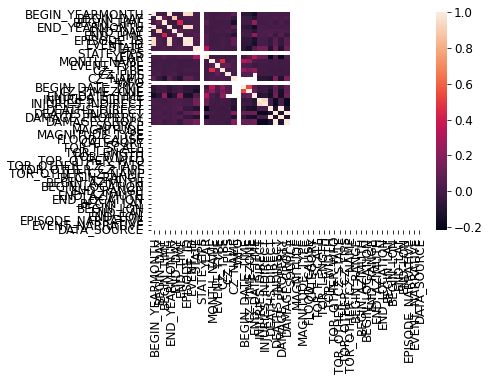

In [42]:
import seaborn
seaborn.heatmap(df.corr(), 
                xticklabels=df.columns, 
                yticklabels=df.columns)

In [48]:
from sklearn.ensemble import RandomForestClassifier
     
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
rfc_preds = rfc.predict(x_test)


In [53]:
rfc_acc = accuracy_score(y_test, rfc_preds)

rfc_acc

0.6458188153310105

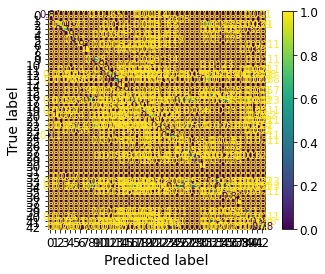

In [55]:
cm = confusion_matrix(rfc_preds, y_test, normalize='pred') 
disp = ConfusionMatrixDisplay(confusion_matrix = cm) 
disp.plot()